In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
# Load the data file
df = pd.read_csv("salary.csv")

print(df.head())
print(df.shape)

# Count and print missing values in each column
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

# Number of duplicate values
print(df.duplicated().sum())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

In [3]:
# Columns to be removed
columns_to_remove = ['fnlwgt', 'occupation', 'native-country', 'education']
df = df.drop(columns=columns_to_remove)

print(df)

       age          workclass  education-num       marital-status  \
0       39          State-gov             13        Never-married   
1       50   Self-emp-not-inc             13   Married-civ-spouse   
2       38            Private              9             Divorced   
3       53            Private              7   Married-civ-spouse   
4       28            Private             13   Married-civ-spouse   
...    ...                ...            ...                  ...   
32556   27            Private             12   Married-civ-spouse   
32557   40            Private              9   Married-civ-spouse   
32558   58            Private              9              Widowed   
32559   22            Private              9        Never-married   
32560   52       Self-emp-inc              9   Married-civ-spouse   

         relationship    race      sex  capital-gain  capital-loss  \
0       Not-in-family   White     Male          2174             0   
1             Husband   White  

In [4]:
# Drop duplicate values
df.drop_duplicates(keep='first',inplace=True)

# Print the labels in the categorical features
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

salary
[' <=50K' ' >50K']


In [5]:
# Removes the leading spaces across the dataset
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace the '?' symbol with 'None' throughout the dataset
df.replace("?", None, inplace=True)

# Check the dataset features with None values
print(df.isna().sum()[df.isna().sum() > 0])

workclass    1616
dtype: int64


In [6]:
# Replace missing information with a specific Unkown label in each feature
df.workclass.fillna(value='UnknCl', inplace=True)

# Checks to see if there any dataset features left with None values
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

In [7]:
# Replace names to be more readable and condensed
df.replace({'workclass': {'State-gov': 'Government', 'Self-emp-not-inc': 'self_employed', 'Federal-gov': 'Government', 
                          'Local-gov': 'Government', 'Self-emp-inc':'self_employed', 'Without-pay': 'Unknown_work', 
                          'Never-worked': 'Unknown_work'}}, inplace=True)
df.replace({'marital-status': {'Married-civ-spouse': 'Married', 'Divorced': 'D.AS.S.W', 'Married-spouse-absent': 
                               'D.AS.S.W', 'Separated': 'D.AS.S.W', 'Married-AF-spouse':'Married', 'Widowed': 
                               'D.AS.S.W'}}, inplace=True)
df.replace({'race': {'Asian-Pac-Islander': 'API', 'NatAm': 'Native_American'}}, inplace=True)

for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
['Government' 'self_employed' 'Private' 'UnknCl' 'Unknown_work']

marital-status
['Never-married' 'Married' 'D.AS.S.W']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'API' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

salary
['<=50K' '>50K']


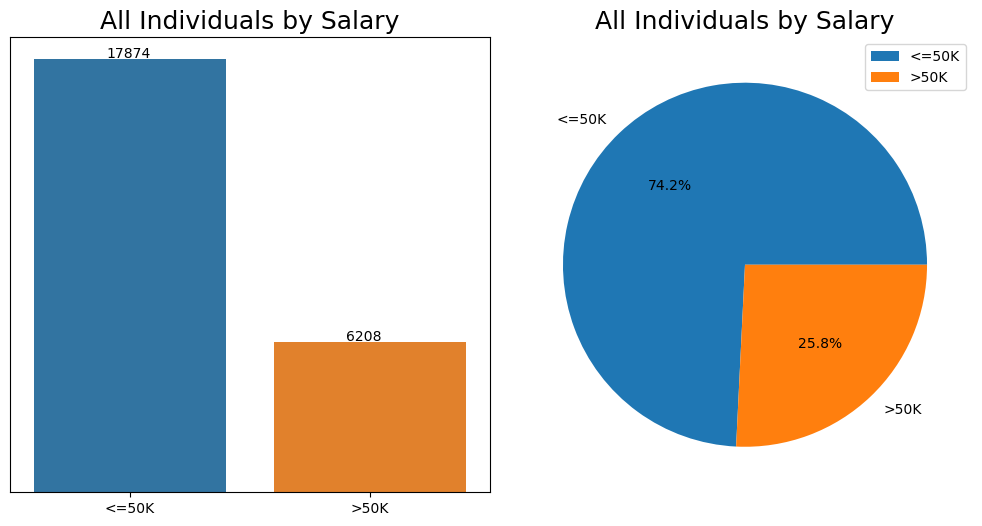

In [8]:
plt.figure(figsize=(15, 15))

# Total Individuals by Salary (in Units)
plt.subplot(3, 3, 1)
plt.title('All Individuals by Salary', fontsize=18)
ax = sns.countplot(x="salary", data=df, order=df['salary'].value_counts().index)
for a in ax.patches:
    ax.annotate('{:.0f}'.format(a.get_height()), (a.get_x() + 0.30, a.get_height() + 40))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

# Total Individuals by Salary (in %)
plt.subplot(3, 3, 2)
plt.title('All Individuals by Salary', fontsize=18)
df['salary'].value_counts().plot(kind='pie', legend=True, ylabel='', autopct='%1.1f%%')

plt.tight_layout()
plt.show()

From this visualization, we can see that approximately 75% of all individials, US Invidiuals, and Non-US individuals made 50K or more. There is more data showing people making greater or equal to $50,000, with 24,698 individuals making 50K+ and 7,839 individuals making less than 50K.

/var/folders/mg/bzsqyq8x6qz7yj_9vxgpjq280000gn/T/ipykernel_8136/1484351010.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


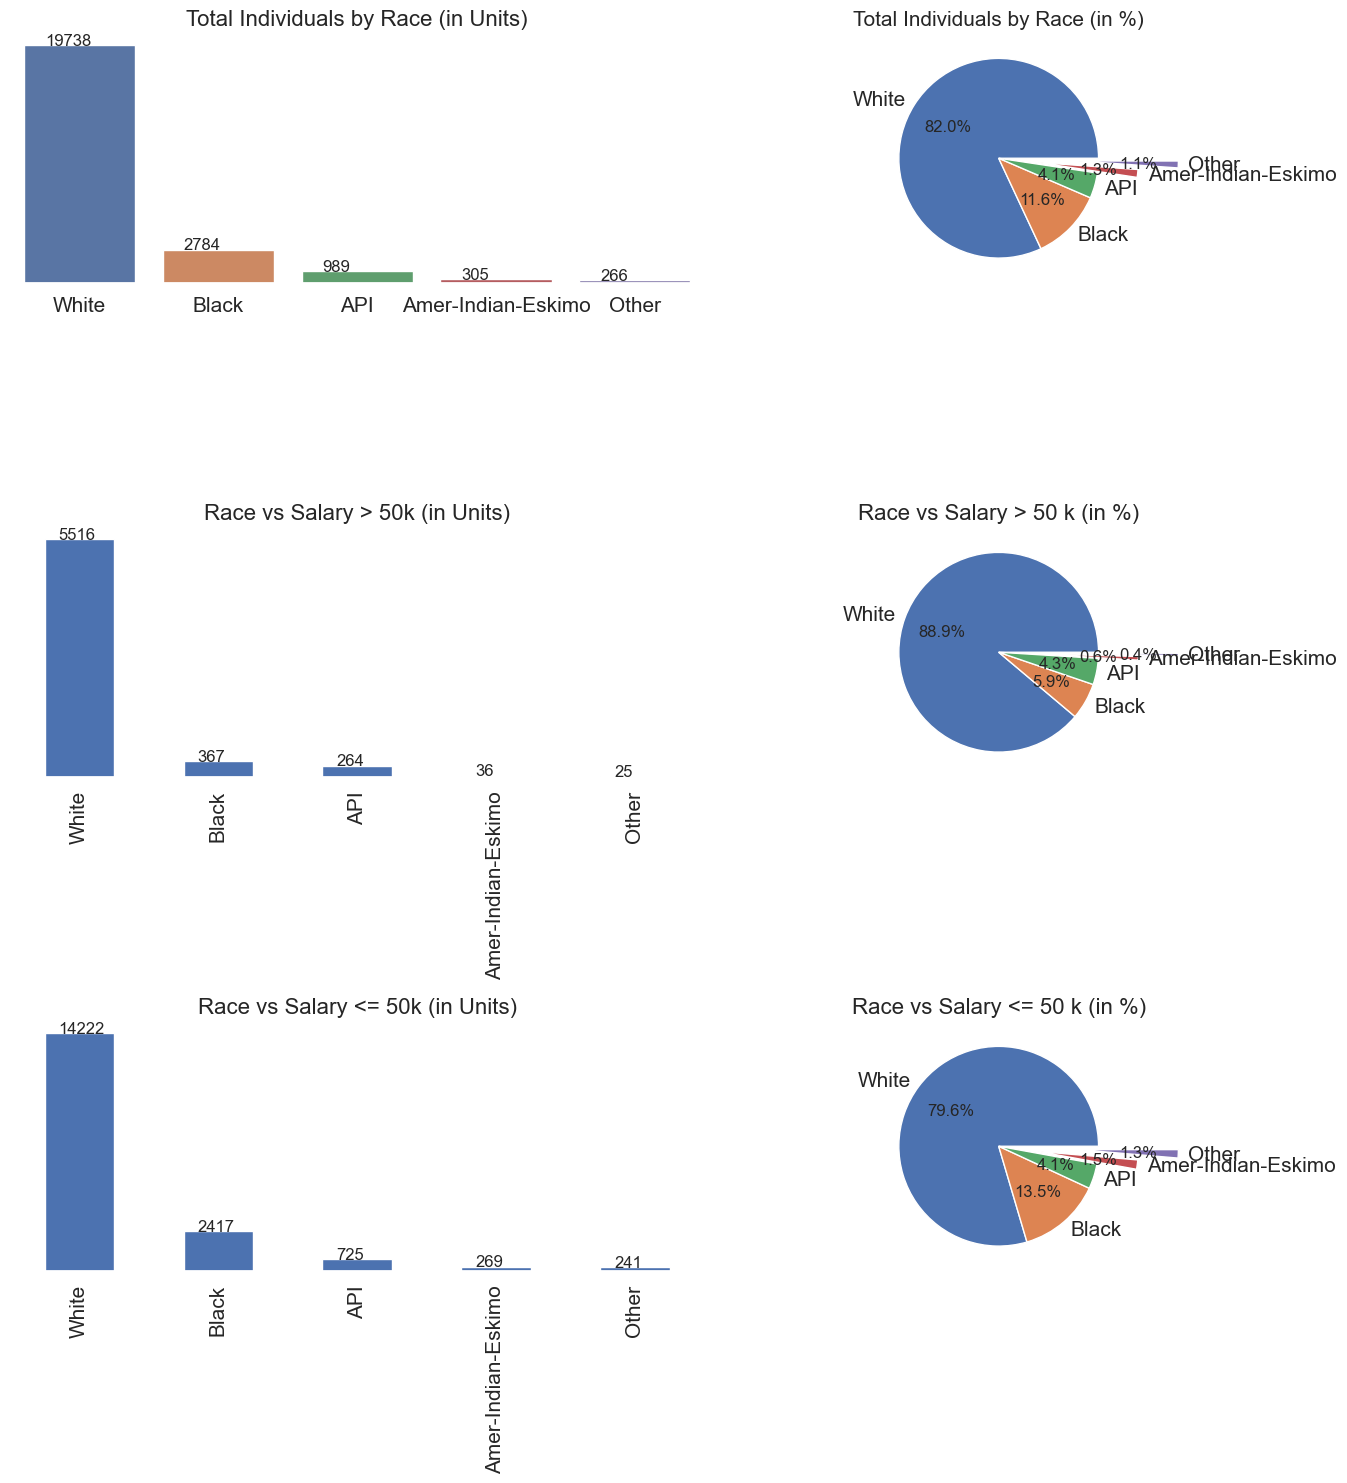

In [9]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':15,'ytick.labelsize':15, 'figure.autolayout':True})

plt.subplots(figsize=(15,15))
my_xpl = [0, 0, 0, 0.4, 0.8]

# Race total (in Units)
plt.subplot(3,2,1)
plt.title('Total Individuals by Race (in Units)', fontdict={'fontsize':16})
ax = sns.countplot(x="race", data=df, order=df['race'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+25))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Race by salary (in Units)
plt.subplot(3,2,2)
plt.title('Total Individuals by Race (in %)', fontdict={'fontsize':15})
df['race'].value_counts().plot(kind='pie', legend=None, ylabel='', explode=my_xpl, autopct='%1.1f%%')

# Race by salary > 50 k (in %)
plt.subplot(3,2,3)
plt.title('Race vs Salary > 50k (in Units)', fontdict={'fontsize':16})
ax = df[df['salary']=='>50K']['race'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Race by salary  > 50 k (in %)
plt.subplot(3,2,4)
plt.title('Race vs Salary > 50 k (in %)', fontdict={'fontsize':16})
df[df['salary']=='>50K']['race'].value_counts().plot(kind='pie', legend=None, ylabel='', explode=my_xpl,  autopct='%1.1f%%')

# Race by salary < = 50 k (in Units)
plt.subplot(3,2,5)
plt.title('Race vs Salary <= 50k (in Units)', fontdict={'fontsize':16})
ax = df[df['salary']=='<=50K']['race'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Race by salary < = 50 k (in %)
plt.subplot(3,2,6)
plt.title('Race vs Salary <= 50 k (in %)', fontdict={'fontsize':16})
df[df['salary']=='<=50K']['race'].value_counts().plot(kind='pie', legend=None, ylabel='', explode=my_xpl, autopct='%1.1f%%')

plt.show()

From this visualization we can see that the large majority of the data is from individuals who identify as White, with the next largest category being Black indivuals. Asian Pacific Islandera, Natives, and Other follow. When comparing Race to Salary an overwhelming majority of individuals making $50,000 or more are White, and the data shows that there is more data of people making more than 50K.

/var/folders/mg/bzsqyq8x6qz7yj_9vxgpjq280000gn/T/ipykernel_8136/3924807451.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 1)


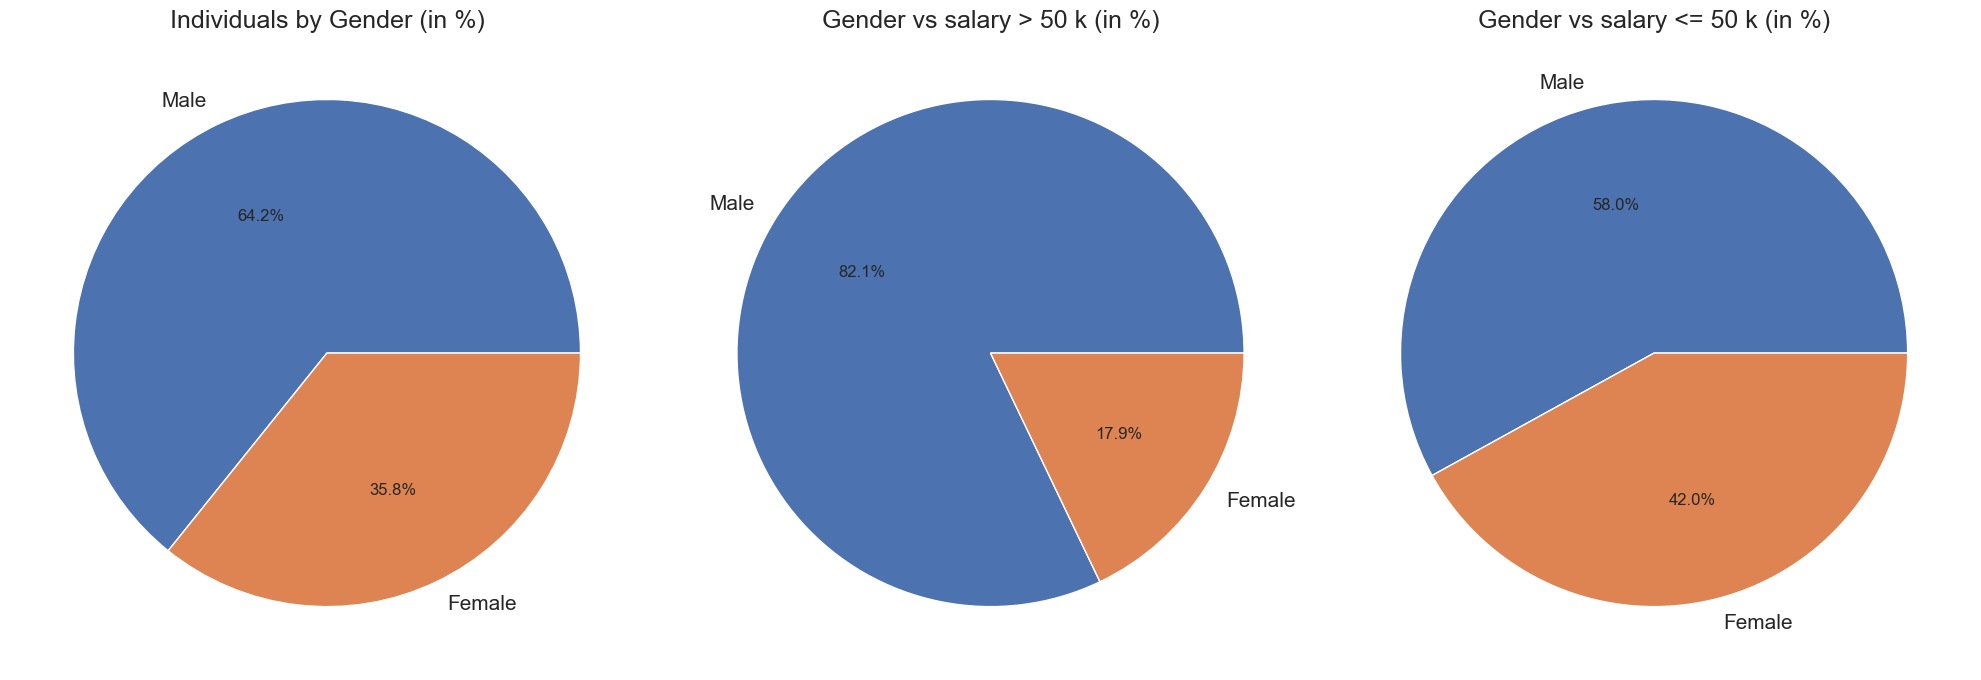

In [10]:
plt.subplots(figsize=(20, 20))

# Gender (in %)
plt.subplot(3, 3, 1)
plt.title('Individuals by Gender (in %)', fontsize=18)
df['sex'].value_counts().plot(kind='pie', legend=None, ylabel='', autopct='%1.1f%%')

# Gender > 50 k (in %)
plt.subplot(3, 3, 2)
plt.title('Gender vs salary > 50 k (in %)', fontsize=18)
df[df['salary'] == '>50K']['sex'].value_counts().plot(kind='pie', legend=None, ylabel='', autopct='%1.1f%%')

# Gender <= 50 k (in %)
plt.subplot(3, 3, 3)
plt.title('Gender vs salary <= 50 k (in %)', fontsize=18)
df[df['salary'] == '<=50K']['sex'].value_counts().plot(kind='pie', legend=None, ylabel='', autopct='%1.1f%%')

plt.show()

The visualizations shows that there are 66.9% males vs 33.1% females, with 15% of females making less than 50K vs 85% of males. 61.2% of males and 38.8% of females are making 50K+.

In [11]:
# Used getDummies to encode categorical variables
df = pd.concat([df.drop('workclass', axis=1),pd.get_dummies(df.workclass).add_prefix('workclass')], axis=1)
df = pd.concat([df.drop('marital-status', axis=1),pd.get_dummies(df['marital-status']).add_prefix('marital-status')], axis=1)

df = pd.concat([df.drop('relationship', axis=1),pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)

df = pd.concat([df.drop('race', axis=1),pd.get_dummies(df.race).add_prefix('race_')], axis=1)


label_encoder_df = df[['sex', 'salary']]

# Label encoding
le = LabelEncoder()

# Encode 'sex' column
df['sex'] = le.fit_transform(df['sex'])

# Encode 'salary' column
df['salary'] = le.fit_transform(df['salary'])

df.head(5)

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclassGovernment,workclassPrivate,workclassUnknCl,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_API,race_Amer-Indian-Eskimo,race_Black,race_Other,race_White
0,39,13,1,2174,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,1,0,0,40,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [12]:
X = df.drop(columns=["salary"])
y = df["salary"]

# Scaling the data
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)
print(f'Train data:', X_train.shape, y_train.shape, '\n', f'Test data:', X_test.shape, y_test.shape)

Train data: (19265, 25) (19265,) 
 Test data: (4817, 25) (4817,)


In [13]:
# Models
Model = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier()]

log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print(name)
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)
    print('\n')
    

KNeighborsClassifier
Accuracy: 80.88022%
Log Loss: 2.4508


SVC
Accuracy: 81.98049%
Log Loss: 0.39087


RandomForestClassifier
Accuracy: 81.06705%
Log Loss: 0.59218




/var/folders/mg/bzsqyq8x6qz7yj_9vxgpjq280000gn/T/ipykernel_8136/4094930748.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


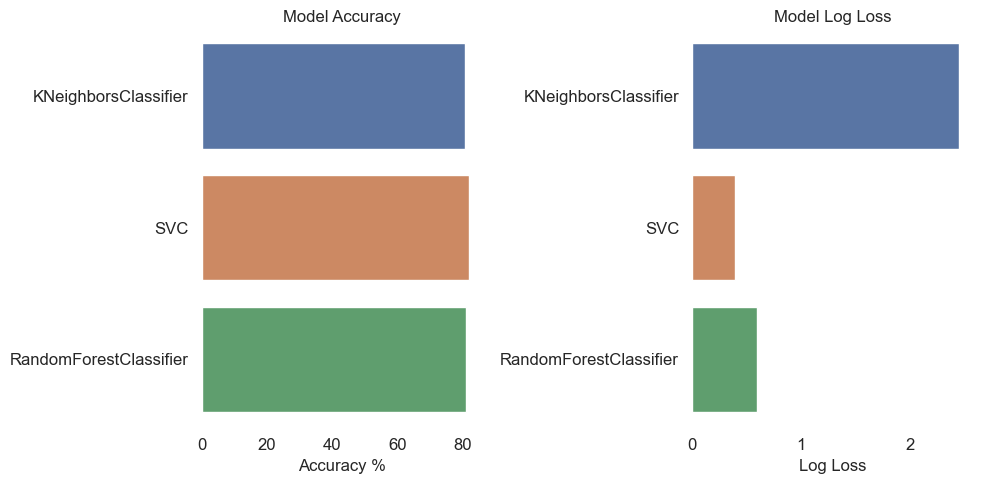

In [14]:
# Visualising the models' accuracy & log loss data
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Model', data=log)
plt.title('Model Accuracy', fontdict={'fontsize':12})
plt.ylabel(None), plt.xlabel('Accuracy %')

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Model', data=log)
plt.title('Model Log Loss', fontdict={'fontsize':12})
plt.ylabel(None), plt.xlabel('Log Loss')

plt.show()

From the visualization, we can see that the model accuracy for Random Forest Classifier is the highest with SVC being close after. However, SVC has less Model Log Loss and Random Forest Classifier has more. But for this project these model accuracies are still on the lower side, so it makes more sense to focus on the accuracy.

In [15]:
# Best model is Random Forest Classifier 
mod_RF = RandomForestClassifier()
mod_RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred_RF = mod_RF.predict(X_test)

# Calculate and print the accuracy
acc_RF = round(mod_RF.score(X_test, y_test) * 100, 2)
print("Accuracy: %i%% \n" % acc_RF)

print(classification_report(y_test, y_pred_RF))

Accuracy: 81% 

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3575
           1       0.65      0.59      0.62      1242

    accuracy                           0.81      4817
   macro avg       0.76      0.74      0.75      4817
weighted avg       0.81      0.81      0.81      4817



In [16]:
# KNeighbors Classifiers parameter grid
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Print the best parameters for KNeighborsClassifier
print("Best parameters for KNeighborsClassifier:", grid_search_knn.best_params_)

# Use the best model
best_knn = grid_search_knn.best_estimator_

# Evaluate the model on the test set
acc_knn = best_knn.score(X_test, y_test) * 100
print("Accuracy for KNeighborsClassifier:", acc_knn)

Best parameters for KNeighborsClassifier: {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy for KNeighborsClassifier: 82.1880838696284


In [17]:
# SVM parameter grid
param_grid_svc = {
    'C': [0.1, 1],
    'gamma': ['scale', 0.001, 0.1],
    'kernel': ['linear', 'rbf']
}

# Create the SVM
svc_classifier = SVC(probability=True)

# Use GridSearchCV to find the best parameters
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc, cv=2, scoring='accuracy', verbose=1)
grid_search_svc.fit(X_train, y_train)

# Print the best parameters for SVM
print("Best parameters for SVM:", grid_search_svc.best_params_)

# Use the best model
best_svc = grid_search_svc.best_estimator_

# Evaluate the model on the test set
acc_svc = best_svc.score(X_test, y_test) * 100
print("Accuracy for SVM:", acc_svc)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy for SVM: 84.55470209674071


In [18]:
# Random Forest Classification parameter grid
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
}

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters for RandomForestClassifier
print("Best parameters for Random Forest:", grid_search.best_params_)

# Use the best model
best_rf = grid_search.best_estimator_

# Evaluate the model on the test set
acc_rf = best_rf.score(X_test, y_test) * 100
print("Accuracy for Random Forest:", acc_rf)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}
Accuracy for Random Forest: 85.46813369317002


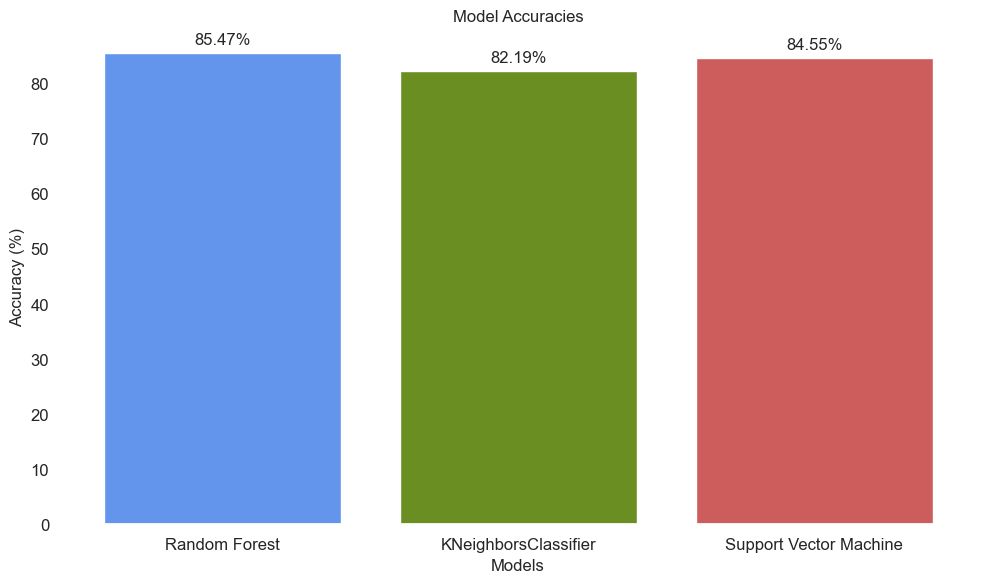

In [19]:
# Accuracy values for the three models
accuracies = [acc_rf, acc_knn, acc_svc]

# Model names
models = ['Random Forest', 'KNeighborsClassifier', 'Support Vector Machine']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['cornflowerblue', 'olivedrab', 'indianred'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

After hyper-tunning it appears that all the models improved a little bit. The Random Forest Classifier is still the best model for this project, with an accuracy of 85.53%.

In [20]:
# Fit the best Random Forest Classifier model
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test)

# Generate and print the classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3575
           1       0.82      0.56      0.67      1242

    accuracy                           0.85      4817
   macro avg       0.84      0.76      0.79      4817
weighted avg       0.85      0.85      0.84      4817

